# Lekce 7

## Regrese

Samotná informace o tom, že existuje statisticky významný vztah mezi obytnou plochou domu a jeho cenou, sice může být zajímavá, ale můžeme zjistit více. K tomu můžeme využít regresi. 

Regrese je nástroj, který umí vztah mezi dvěma proměnnými popsat. 

Abychom si pod slovem "popsat" dokázali něco představit, využijeme graf. Využijeme opět modul `seaborn`, tentokrát vygenerujeme graf pomocí funkce `regplot()`. 

U regrese vždy rozlušujeme mezi **závislou** (**vysvětlovanou**) a **nezávislou** (**vysvětlující**) proměnnou. Závislou proměnnou umísťujeme na svislou osu (*y*) a nezávislou vodorovnou osu (*x*). V našem případě je nezávislou proměnnou obytná plocha domu a závislou proměnnou cena. Tvrdíme totiž, že obytná plocha domu ovlivňuje cenu, tj. cenu vysvětlujeme pomocí obytné plochy.

In [30]:
import pandas
import seaborn
import matplotlib.pyplot as plt

data = pandas.read_csv("house_prices.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946+,RL,65.0,8450,Pave,NaN,0,Lvl,3,...,0,0,0,NaN,0,Feb,2008,WD,Normal,208500
1,2,1-STORY 1946+,RL,80.0,9600,Pave,NaN,0,Lvl,3,...,0,0,0,NaN,0,May,2007,WD,Normal,181500
2,3,2-STORY 1946+,RL,68.0,11250,Pave,NaN,1,Lvl,3,...,0,0,0,NaN,0,Sept,2008,WD,Normal,223500
3,4,2-STORY 1945-,RL,60.0,9550,Pave,NaN,1,Lvl,3,...,0,0,0,NaN,0,Feb,2006,WD,Abnorml,140000
4,5,2-STORY 1946+,RL,84.0,14260,Pave,NaN,1,Lvl,3,...,0,0,0,NaN,0,Dec,2008,WD,Normal,250000


## .regplot()

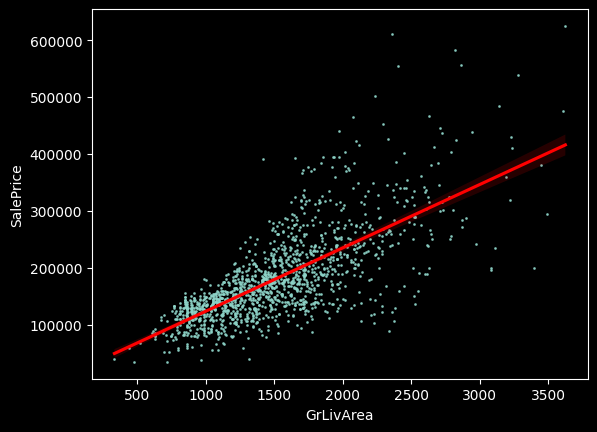

In [31]:
g = seaborn.regplot(
    data, x="GrLivArea", y="SalePrice", scatter_kws={"s": 1}, line_kws={"color": "r"}
)

## Outliers

V datech vidíme velké množství tzv. odlehlých pozorování (outliers). V řadě případů se taková pozorování odebírají, protože mají na regresní funkci negativní vliv. Jak ale rozpoznat odlehlné pozorování? Existuje řada způsobů, jak odlehlá pozorování odebrat. Jedna z nejjenodušších metod je z-score, které je počítáno dle vzorce *(x - průměr) / směrodatná odchylka*.

Uvažujme následující případ. Máme průměr hodnot 5 a směrodatnou odchylku 2. Pokud je nějaká hodnota 6, je její z-score 0.5. Pro hodnotu 1 je z-score - 2. Hodnota 6 je tedy méně odlehlá než hodnota 1. Hodnota z-score, od které budeme pozorování odebírat, může být například 2 nebo 3. Samozřejmě uvažujeme absolutní hodnotu vypočteného z-score, kterou můžeme získat pomocí modulu `numpy`.

Na grafu níže je vidět, že nejvíce odlehlá pozorování byla odebrána.

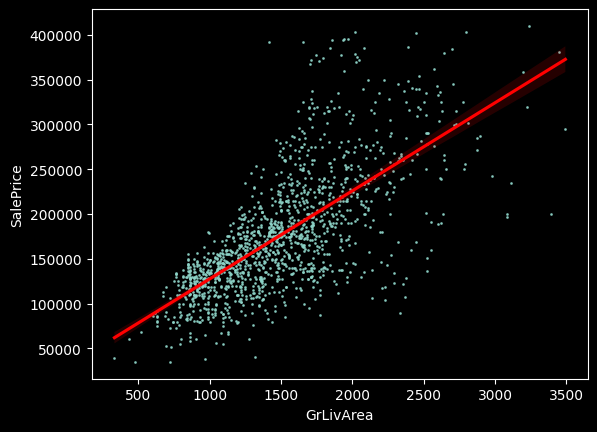

In [19]:
from scipy import stats
import numpy

data["SalePriceZScore"] = numpy.abs(stats.zscore(data["SalePrice"]))
data = data[data["SalePriceZScore"] < 3]
g = seaborn.regplot(
    data, x="GrLivArea", y="SalePrice", scatter_kws={"s": 1}, line_kws={"color": "r"}
)

## Regresní model

Pojďme nyní provést výpočet regresního modelu. Výsledky zobrazíme v tabulce `OLS Regression Results`.

Tabulka je velmi rozsáhlá a my si vysvětlíme hlavní hodnoty, které nás zajímají.

Hlavní jsou hodnoty regresních koeficientů - `Intercept` a `GrLivArea`.

- `Intercept` je kontanta. Teoreticky nám říká, kolik by stál dům o nulové velikosti (což je samozřejmě v praxi nesmysl). Geometricky řečeno, pokud bychom protáhli červenou čáru, tento koeficient nám říká, kde by čára protla osu *y* (svislou osu).
- `GrLivArea` udává sklon čáry. Čím je koeficient vyšší, tím více si musíme připlatit za každou další čtvereční stopu. 

U nepřímých závislostí je koeficient u vysvětlující proměnné záporný (např. venkovní teplota a spotřeba energie na vytápění - čím je teplejší počasí, tím méně topíme, za každý stupeň nahoru klesně spotřeba o 100 kW).

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "SalePrice ~ GrLivArea"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     1357.
Date:                Thu, 18 May 2023   Prob (F-statistic):          1.39e-209
Time:                        18:42:15   Log-Likelihood:                -17491.
No. Observations:                1434   AIC:                         3.499e+04
Df Residuals:                    1432   BIC:                         3.500e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.911e+04   4171.056      6.979      0.000    2.09e+04    3.73e+04
GrLivArea     98.3600      2.670     36.844      0.000      93.123     103.597
==============================================================================
Omnibus:                      131.107   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.277
Skew:                           0.514   Prob(JB):                     1.91e-72
Kurtosis:                       5.114   Cond. No.                     5.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Rezidua

Jak ale program na tyto koeficienty přišel?

Přidejme si do tabulky `data` dva sloupce:

- `fittedvalues` (vyrovnané hodnoty) jsou hodnoty odhadované modelem, tj. cena domu, kterou by predikoval náš model na základě jeho velikosti,
- `resid` (rezidua) je rozdíl mezi skutečnou cenou domu a predikovanou cenou.

Regrese funguje na principu minimalizace druhé mocniny součtu reziduí. Tj. vypočtené koeficienti minimalizují druhou mocninu součtu reziduí.

In [21]:
data["residuals"] = res.resid
data["predictions"] = res.fittedvalues
data[["GrLivArea", "SalePrice", "predictions", "residuals"]]

,GrLivArea,SalePrice,predictions,residuals
0,1710,208500,197305.936099,11194.063901
1,1262,181500,153240.661054,28259.338946
2,1786,223500,204781.295259,18718.704741
3,1717,140000,197994.456022,-57994.456022
4,2198,250000,245305.610702,4694.389298
...,...,...,...,...
1451,1647,175000,191109.256796,-16109.256796
1452,2073,210000,233010.612085,-23010.612085
1453,2340,266500,259272.729132,7227.270868
1454,1078,142125,135142.423089,6982.576911


Pro regresi je dále důležité, aby rezidua měla normální rozdělení. 


Pro testování normality je možné využít standardní testy, modul `statsmodels` nám nabízí výsledky dvou testů: Omnibus testu a Jarque-Bera testu. Oba fungují na základě tvaru distribuční funice - šikmosti (jak moc je hustota symetrická) a špičatosti (jak rychle hustota od středu klesá). Poskytnuté p-hodnoty (ty jsou vždy označené jako `Prob.`) jsou v obou případech menší než 0.05, zamítáme tedy hypotézu normality reziduí.

<Axes: ylabel='Density'>

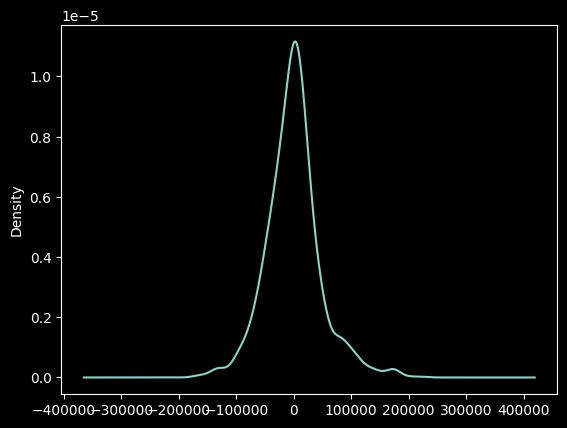

In [22]:
data["residuals"].plot.kde()

<Axes: ylabel='Count'>

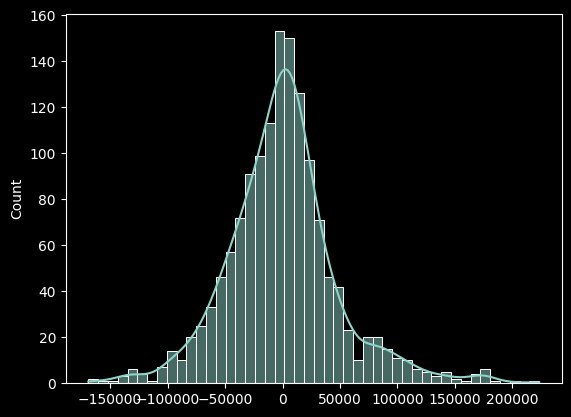

In [23]:
import seaborn

seaborn.histplot(res.resid, kde=True)

Pokud rezidua nejsou normální, můžeme zkusit provést úpravu vysvětlované proměnné. 

Takovou úpravu nazýváme transformací. Existuje řada transformací, můžeme vyzkoušet například logaritmickou transformaci. V takovém případě nahradíme původní ceny logaritmy cen.

In [24]:
import numpy

data = pandas.read_csv("house_prices.csv")

data["lnSalePrice"] = numpy.log(data["SalePrice"])
data[["SalePrice", "lnSalePrice"]]

,SalePrice,lnSalePrice
0,208500,12.247694
1,181500,12.109011
2,223500,12.317167
3,140000,11.849398
4,250000,12.429216
...,...,...
1451,175000,12.072541
1452,210000,12.254863
1453,266500,12.493130
1454,142125,11.864462


Spočítáme nyní model znovu.

In [25]:
formula = "lnSalePrice ~ GrLivArea"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            lnSalePrice   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     1555.
Date:                Thu, 18 May 2023   Prob (F-statistic):          7.33e-232
Time:                        18:42:17   Log-Likelihood:                -187.62
No. Observations:                1456   AIC:                             379.2
Df Residuals:                    1454   BIC:                             389.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1586      0.023    483.993      0.000      11.113      11.204
GrLivArea      0.0006   1.45e-05     39.430      0.000       0.001       0.001
==============================================================================
Omnibus:                      108.360   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.482
Skew:                          -0.550   Prob(JB):                     1.06e-39
Kurtosis:                       4.322   Cond. No.                     5.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ani v tomto případě nejsou rezidua normální.

Normalita reziudí nám brání v použití řady údajů, které nám modul vypočítal. Pokud by rezidua byla normální, mohli bychom interpretovat následující údaje:

- `F-statistic` - testuje hypotézu, zda je model statisticky významný jako celek. To oceníme hlavně v případě modelu s více proměnnými. Pokud by byla p-hodnota více než 0.05, je model statisticky nevýznamný (tj. nic nám neříká).
- `P>|t|` - testuje hypotézu, zda je statisticky významný konkrétní koeficient. Test se tedy počítá pro každý koeficient zvlášť. Pokud by byla p-hodnota více než 0.05, je koeficient statisticky nevýznamný.

Použít ale můžeme základní měřítko kvality modelu, což je koeficient determinace `R-squared`. Ten nám říká, kolik procet rozptylu vysvětlované proměnné jsme naším modelem vysvětlili.

Více informací najdete například v [tomto článku](https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a).

## Robustní regrese

V případě odlehlých pozorování a porušení normality je možné využít i robustní regresi. Ta přiřazuje odlehlejším pozorováním nižší váhu, tj. odlehlá pozorování nám tolik nevychýlí regresní funkci.

Přehled různých metod, jak snížit váhu koeficientů, jsou [zde](https://www.statsmodels.org/dev/examples/notebooks/generated/robust_models_1.html).

In [26]:
data = pandas.read_csv("house_prices.csv")

data_x = data["GrLivArea"].to_frame()
data_x = sm.add_constant(data_x)

rlm_model = sm.RLM(data["SalePrice"], data_x)
rlm_results = rlm_model.fit()
rlm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              SalePrice   No. Observations:                 1456
Model:                            RLM   Df Residuals:                     1454
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 18 May 2023                                         
Time:                        18:42:17                                         
No. Iterations:                     3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.815e+04   3541.705      5.124      0.000    1.12e+04    2.51e+04
GrLivArea    105.7028      2.233     47.342      0.000     101.327     110.079
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [27]:
sum(numpy.abs(rlm_results.resid))

53571953.88170824

In [28]:
data_x = data[["GrLivArea", "GarageArea"]]
data_x = sm.add_constant(data_x)

rlm_model = sm.RLM(data["SalePrice"], data_x)
rlm_results = rlm_model.fit()
rlm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              SalePrice   No. Observations:                 1456
Model:                            RLM   Df Residuals:                     1453
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 18 May 2023                                         
Time:                        18:42:17                                         
No. Iterations:                     5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2247.0002   3125.948     -0.719      0.472   -8373.747    3879.746
GrLivArea     79.1223      2.120     37.313      0.000      74.966      83.278
GarageArea   130.0671      4.970     26.173      0.000     120.327     139.807
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [29]:
sum(numpy.abs(rlm_results.resid))

45903817.078424305